<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nadzorowane/3_Klasyfikacja/1_Regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Regresja logostyczna
1. [Import bibliotek](#a1)
2. [Regresja Logistyczna (Logistic Regression) - wprowadzenie](#a2)
3. [Załadowanie danych](#a3)
4. [Podział danych na zbiór treningowy i testowy](#a4)
5. [Przygotowanie danych do modelu](#a44)
6. [Dopasowanie modelu](#a5)
7. [Predykcja na podstawie modelu](#a6)
8. [Ocena modelu](#a7)

###  <a name='a2'></a>  Regresja Logistyczna (Logistic Regression) - wprowadzenie

Pomimo nazwy jest to liniowy model do zadań klasyfikacyjnych. Inna nazwa Logit Regression. 

#### Przykłady zastosowań:
- przewidywanie czy mail jest spamem, czy też nie
- przewidywanie czy użytkownik kliknie w reklamę
- przewidywanie czy nowotwór jest złośliwy czy też nie
- przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
- przewidywanie czy transakcja jest próbą oszustwa

Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem:
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

### <a name='a1'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

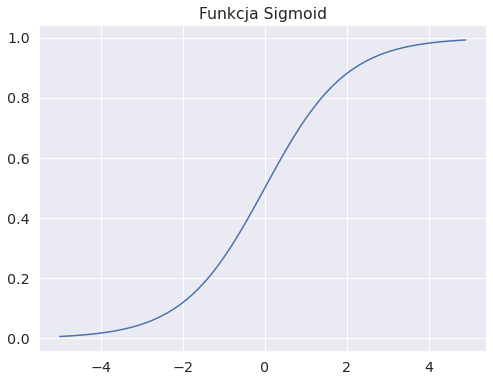

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Funkcja Sigmoid')
plt.show()

Następnie rozważmy funkcję liniową $y = w_0 + w_1x$. Podstawiając to do funkcji sigmoid otrzymujemy:
$$p(x) = \frac{1}{1 + e^{-(w_0 + w_1x)}}$$
Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0, 1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

###  <a name='a3'></a> Załadowanie danych

In [3]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(raw_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (569, 30)
target shape: (569,)


###  <a name='a4'></a> Podział danych na zbiór treningowy i testowy

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


###  <a name='a44'></a> Przygotowanie danych do modelu

In [10]:
X_train[:5]

array([[12.89, 13.12, 81.89, 515.90, 0.07, 0.04, 0.02, 0.01, 0.13, 0.06, 0.15, 0.47, 1.11, 12.68, 0.00, 0.01, 0.02, 0.01, 0.02, 0.00, 13.62, 15.54, 87.40, 577.00, 0.10, 0.11, 0.12, 0.05, 0.23, 0.07],
       [13.40, 20.52, 88.64, 556.70, 0.11, 0.15, 0.14, 0.08, 0.21, 0.07, 0.39, 0.93, 3.09, 33.67, 0.01, 0.02, 0.03, 0.01, 0.02, 0.00, 16.41, 29.66, 113.30, 844.40, 0.16, 0.39, 0.51, 0.21, 0.36, 0.11],
       [12.96, 18.29, 84.18, 525.20, 0.07, 0.08, 0.04, 0.02, 0.19, 0.06, 0.24, 1.30, 2.40, 20.21, 0.00, 0.04, 0.03, 0.01, 0.03, 0.00, 14.13, 24.61, 96.31, 621.90, 0.09, 0.23, 0.16, 0.07, 0.32, 0.07],
       [17.75, 28.03, 117.30, 981.60, 0.10, 0.13, 0.17, 0.08, 0.17, 0.06, 0.39, 1.08, 2.87, 43.95, 0.00, 0.02, 0.04, 0.01, 0.01, 0.00, 21.53, 38.54, 145.40, 1437.00, 0.14, 0.38, 0.64, 0.20, 0.30, 0.09],
       [20.58, 22.14, 134.70, 1290.00, 0.09, 0.13, 0.16, 0.10, 0.18, 0.05, 0.86, 1.48, 7.03, 111.70, 0.01, 0.04, 0.05, 0.03, 0.03, 0.00, 23.24, 27.84, 158.30, 1656.00, 0.12, 0.29, 0.39, 0.19, 0.29

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  #fit tylko na X_test!

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5]

array([[-0.35, -1.44, -0.41, -0.39, -1.86, -1.27, -0.83, -0.95, -1.73, -0.94, -0.87, -1.36, -0.83, -0.57, -0.75, -0.65, -0.53, -0.95, -0.54, -0.63, -0.54, -1.66, -0.59, -0.53, -1.51, -0.89, -0.75, -0.92, -0.93, -0.81],
       [-0.20, 0.31, -0.13, -0.28, 1.08, 0.86, 0.73, 0.90, 1.18, 1.47, -0.04, -0.51, 0.11, -0.13, -0.52, -0.15, 0.07, 0.24, -0.43, 0.08, 0.04, 0.69, 0.19, -0.05, 1.13, 0.92, 1.22, 1.44, 1.15, 1.57],
       [-0.33, -0.22, -0.32, -0.36, -1.58, -0.46, -0.60, -0.76, 0.28, -0.50, -0.58, 0.17, -0.22, -0.42, -1.10, 0.64, 0.07, -0.19, 0.73, -0.03, -0.44, -0.15, -0.32, -0.45, -1.63, -0.11, -0.54, -0.72, 0.53, -0.62],
       [1.03, 2.09, 1.05, 0.92, 0.32, 0.56, 1.05, 0.93, -0.33, -0.48, -0.04, -0.24, 0.00, 0.08, -0.75, -0.29, 0.16, -0.12, -1.02, -0.46, 1.11, 2.17, 1.17, 1.00, 0.38, 0.86, 1.87, 1.31, 0.15, 0.42],
       [1.83, 0.70, 1.76, 1.78, -0.33, 0.63, 0.97, 1.27, -0.13, -1.71, 1.60, 0.50, 1.99, 1.49, 0.35, 0.59, 0.75, 2.52, 1.41, -0.53, 1.47, 0.39, 1.56, 1.39, -0.58, 0.30, 0.

In [13]:
scaler.mean_

array([14.12, 19.20, 91.89, 654.92, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.40, 1.21, 2.86, 40.13, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.21, 25.51, 106.89, 873.72, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

In [14]:
scaler.scale_

array([3.53, 4.23, 24.28, 356.02, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.54, 2.09, 47.97, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.78, 6.02, 33.04, 564.58, 0.02, 0.15, 0.20, 0.06, 0.06, 0.02])

###<a name='a5'></a>  Dopasowanie modelu

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###<a name='a6'></a>  Predykcja na podstawie modelu

In [18]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [20]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:10]

array([[0.12, 0.88],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.96, 0.04],
       [0.42, 0.58],
       [0.00, 1.00]])

###<a name='a7'></a>  Ocena modelu

accuracy score: 0.9790209790209791



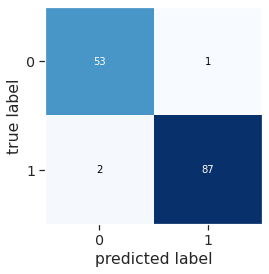

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'accuracy score: {accuracy_score(y_test, y_pred)}\n')

In [30]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

